Gursheen Kaur Anand(221)

# CODE

# 0. Import and Install Dependencies.

In [1]:
!pip install easyocr
!pip install imutils
!pip install matplotlib
!pip install numpy

You should consider upgrading via the 'G:\Gursheen\Anaconda\envs\env_easyocr\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'G:\Gursheen\Anaconda\envs\env_easyocr\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'G:\Gursheen\Anaconda\envs\env_easyocr\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'G:\Gursheen\Anaconda\envs\env_easyocr\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
from matplotlib import pyplot as plt
import imutils
import numpy as np
import easyocr

# 1. Read the image,Grayscale and blur.

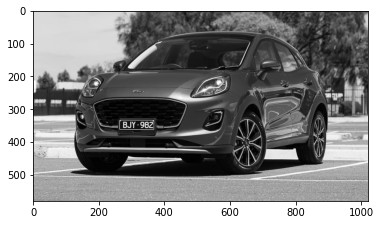

In [130]:
img=cv2.imread('image3.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

# 2. Apply filter and find edges for localization.

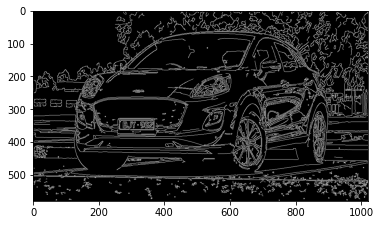

In [131]:
bfilter=cv2.bilateralFilter(gray,11,17,17)#Noise Reduction
edged=cv2.Canny(bfilter,30,100)#Edge Detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

# 3. Find contours and apply mask. 

In [132]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [133]:
location=None
for contour in contours:
    approx=cv2.approxPolyDP(contour,20,True)
    if len(approx)==4:
        location=approx
        break
location

array([[[263, 334]],

       [[264, 363]],

       [[369, 362]],

       [[366, 333]]], dtype=int32)

In [134]:
mask=np.zeros(gray.shape,np.uint8)
new_img=cv2.drawContours(mask,[location],0,255,-1)
new_img=cv2.bitwise_and(img,img,mask=mask)

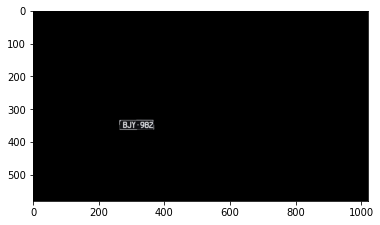

In [135]:
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))

In [136]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_img=gray[x1+5:x2-5,y1:y2]

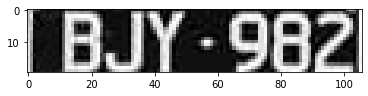

In [137]:
plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_BGR2RGB))

# 4. Use EasyOCR to read text.

In [141]:
reader=easyocr.Reader(['en'],gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [142]:
result=reader.readtext(cropped_img)

In [143]:
result

[([[6, 0], [106, 0], [106, 20], [6, 20]], 'BJY. 982', 0.6747089331549762)]

.

# 5. Render Result.

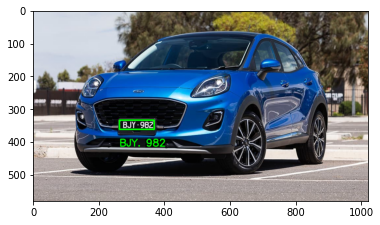

In [144]:
text=result[0][-2]
f=cv2.FONT_HERSHEY_SIMPLEX
op_img=cv2.putText(img,text=text,org=(location[0][0][0],location[1][0][1]+50),fontFace=f,
                   fontScale=1,color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)
op_img=cv2.rectangle(op_img,tuple(location[0][0]),tuple(location[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(op_img,cv2.COLOR_BGR2RGB))

In [1]:
!pip install jovian

You should consider upgrading via the 'G:\Gursheen\Anaconda\envs\env_easyocr\python.exe -m pip install --upgrade pip' command.


In [2]:
import jovian

<IPython.core.display.Javascript object>

In [4]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gur-k-anand/licensedetection" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/gur-k-anand/licensedetection


'https://jovian.ai/gur-k-anand/licensedetection'